# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [50]:
%pip install iso3166


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [51]:
%pip install --upgrade plotly

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [52]:
%pip install pandas
%pip install matplotlib


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [53]:
# %pip install seaborn

In [54]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
# import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [55]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [56]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [57]:
df_data.shape

(4324, 9)

In [58]:
df_data.size

38916

In [59]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [60]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [61]:
df_clean = df_data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])


In [62]:
df_clean.duplicated().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [63]:
df_clean = df_clean.drop_duplicates()


## Descriptive Statistics

In [64]:
df_clean.shape

(4323, 7)

In [65]:
df_clean.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [66]:
missions_by_org = df_clean.groupby("Organisation").count()

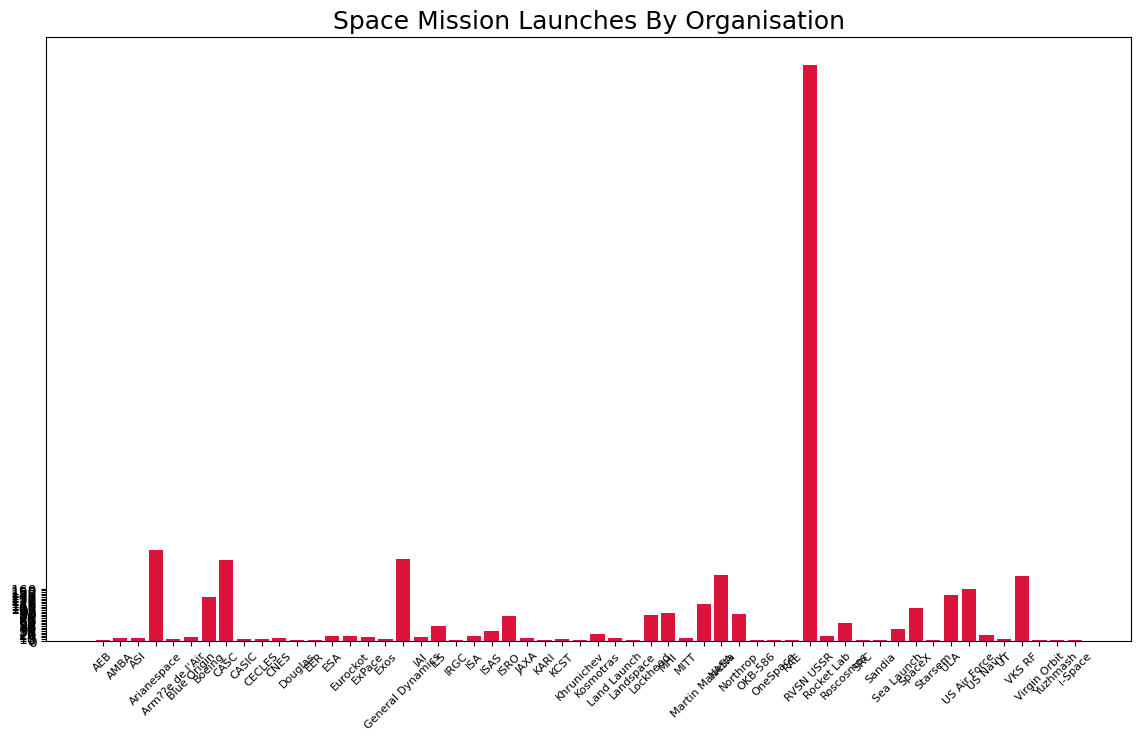

In [67]:
plt.figure(figsize=(14,8), dpi=100)
plt.title('Space Mission Launches By Organisation', fontsize=18)
plt.yticks( np.arange(0, 165, step=5))
plt.xticks(fontsize=8, rotation=45)
plt.bar(missions_by_org.index, 
        missions_by_org["Date"], 
        color='crimson')
 
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [68]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [69]:
df_clean.groupby("Rocket_Status").count()

,Organisation,Location,Date,Detail,Price,Mission_Status
Rocket_Status,,,,,,
StatusActive,789,789,789,789,585,789
StatusRetired,3534,3534,3534,3534,378,3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [70]:
df_clean.groupby("Mission_Status").count()

,Organisation,Location,Date,Detail,Rocket_Status,Price
Mission_Status,,,,,,
Failure,339,339,339,339,339,36
Partial Failure,102,102,102,102,102,17
Prelaunch Failure,4,4,4,4,4,1
Success,3878,3878,3878,3878,3878,909


In [71]:
df_clean.groupby("Rocket_Status").count()

,Organisation,Location,Date,Detail,Price,Mission_Status
Rocket_Status,,,,,,
StatusActive,789,789,789,789,585,789
StatusRetired,3534,3534,3534,3534,378,3534


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [72]:
df_price_clean = df_clean.dropna()
df_price_clean['Price'] = pd.to_numeric(df_price_clean['Price'].apply(lambda x: x.replace(',','')))

/var/folders/vx/f1x8dzvs4cl41y_bkjfxpbc40000gn/T/ipykernel_20890/3611066267.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
missions_by_cost = df_price_clean.sort_values(by=["Price"]).groupby("Price").count()

In [74]:
type(df_price_clean['Price'][0])

numpy.float64

In [75]:
missions_by_cost.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
count,56.00,56.00,56.00,56.00,56.00,56.00
mean,17.20,17.20,17.20,17.20,17.20,17.20
std,21.96,21.96,21.96,21.96,21.96,21.96
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,4.00,4.00,4.00,4.00,4.00
50%,11.00,11.00,11.00,11.00,11.00,11.00
75%,22.00,22.00,22.00,22.00,22.00,22.00
max,136.00,136.00,136.00,136.00,136.00,136.00


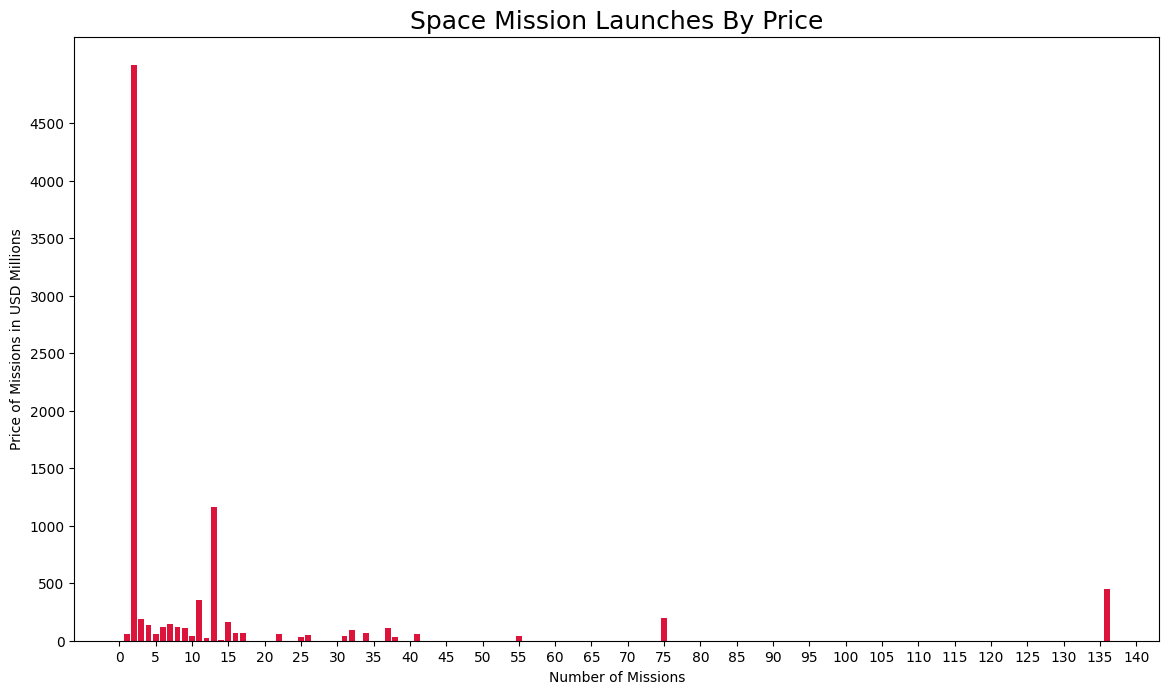

In [76]:
plt.figure(figsize=(14,8), dpi=100)
plt.title('Space Mission Launches By Price', fontsize=18)
plt.xticks(np.arange(0, 145, step=5))
plt.xlabel('Number of Missions')
plt.yticks(np.arange(0, 5000, step=500))
plt.ylabel("Price of Missions in USD Millions")
plt.bar(missions_by_cost["Detail"], 
        missions_by_cost.index, 
        color='crimson')
 
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [77]:
df_clean.insert(loc=7,column="Country", value=df_clean["Location"].apply(lambda x: x.split(", ")[-1]))

In [78]:
df_clean[df_clean["Country"] == "Iran"]["Location"]

52     Imam Khomeini Spaceport, Semnan Space Center, ...
106    Imam Khomeini Spaceport, Semnan Space Center, ...
163    Imam Khomeini Spaceport, Semnan Space Center, ...
169    Imam Khomeini Spaceport, Semnan Space Center, ...
335    Imam Khomeini Spaceport, Semnan Space Center, ...
515    Imam Khomeini Spaceport, Semnan Space Center, ...
518    Imam Khomeini Spaceport, Semnan Space Center, ...
632    Imam Khomeini Spaceport, Semnan Space Center, ...
646    Imam Khomeini Spaceport, Semnan Space Center, ...
658    Imam Khomeini Spaceport, Semnan Space Center, ...
684    Imam Khomeini Spaceport, Semnan Space Center, ...
785    Imam Khomeini Spaceport, Semnan Space Center, ...
806    Imam Khomeini Spaceport, Semnan Space Center, ...
Name: Location, dtype: object

In [79]:
country_names = {
    "Russia" : "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran, Islamic Republic of",
    "Iran": "Iran, Islamic Republic of",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    "North Korea": "Korea, Democratic People's Republic of",
    "South Korea": "Korea, Republic of",
    "Pacific Ocean": "Russian Federation"
}
df_clean["Country"] = df_clean["Country"].apply(lambda x: country_names[x] if x in country_names.keys() else x)
df_clean["Country"] = df_clean["Country"].apply(lambda con: countries.get(con).alpha3)

In [80]:
%pip install --upgrade nbformat

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [81]:
launches_by_country = df_clean.groupby("Country").count().reset_index()
launches_by_country

,Country,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,AUS,6,6,6,6,6,0,6
1,BRA,3,3,3,3,3,0,3
2,CHN,268,268,268,268,268,158,268
3,FRA,303,303,303,303,303,95,303
4,IND,76,76,76,76,76,67,76
5,IRN,14,14,14,14,14,0,14
6,ISR,11,11,11,11,11,0,11
7,JPN,126,126,126,126,126,40,126
8,KAZ,701,701,701,701,701,46,701
9,KEN,9,9,9,9,9,0,9


In [82]:
%pip install requests

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [83]:
import requests
response = requests.get('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json')
nations = response.json()

In [84]:
launches_by_country

,Country,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,AUS,6,6,6,6,6,0,6
1,BRA,3,3,3,3,3,0,3
2,CHN,268,268,268,268,268,158,268
3,FRA,303,303,303,303,303,95,303
4,IND,76,76,76,76,76,67,76
5,IRN,14,14,14,14,14,0,14
6,ISR,11,11,11,11,11,0,11
7,JPN,126,126,126,126,126,40,126
8,KAZ,701,701,701,701,701,46,701
9,KEN,9,9,9,9,9,0,9


In [85]:
fig = px.choropleth(launches_by_country, geojson=launches_by_country["Country"], color='Detail',
                    locations=launches_by_country["Country"], featureidkey="properties.count",
                    projection="mercator",
                    color_continuous_scale="Viridis"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [86]:
failures_by_country = df_clean[df_clean["Mission_Status"] != "Success"].groupby("Country").count()
failures_by_country

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
Country,,,,,,,
AUS,3,3,3,3,3,0,3
BRA,3,3,3,3,3,0,3
CHN,25,25,25,25,25,7,25
FRA,18,18,18,18,18,3,18
IND,13,13,13,13,13,8,13
IRN,9,9,9,9,9,0,9
ISR,2,2,2,2,2,0,2
JPN,13,13,13,13,13,0,13
KAZ,93,93,93,93,93,3,93


In [87]:
fig = px.choropleth(failures_by_country, geojson=failures_by_country.index, color='Detail',
                    locations=failures_by_country.index, featureidkey="properties.count",
                    projection="mercator",
                    color_continuous_scale="Viridis"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [88]:
missions_grouped = df_clean.groupby(['Country', 'Organisation', 'Mission_Status']).count().reset_index()

In [89]:
fig = px.sunburst(missions_grouped, path=['Country', 'Organisation', 'Mission_Status'], values='Detail', color="Mission_Status")
fig.update_traces(insidetextorientation='radial')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [90]:
price_by_org = df_price_clean.groupby("Organisation").sum()

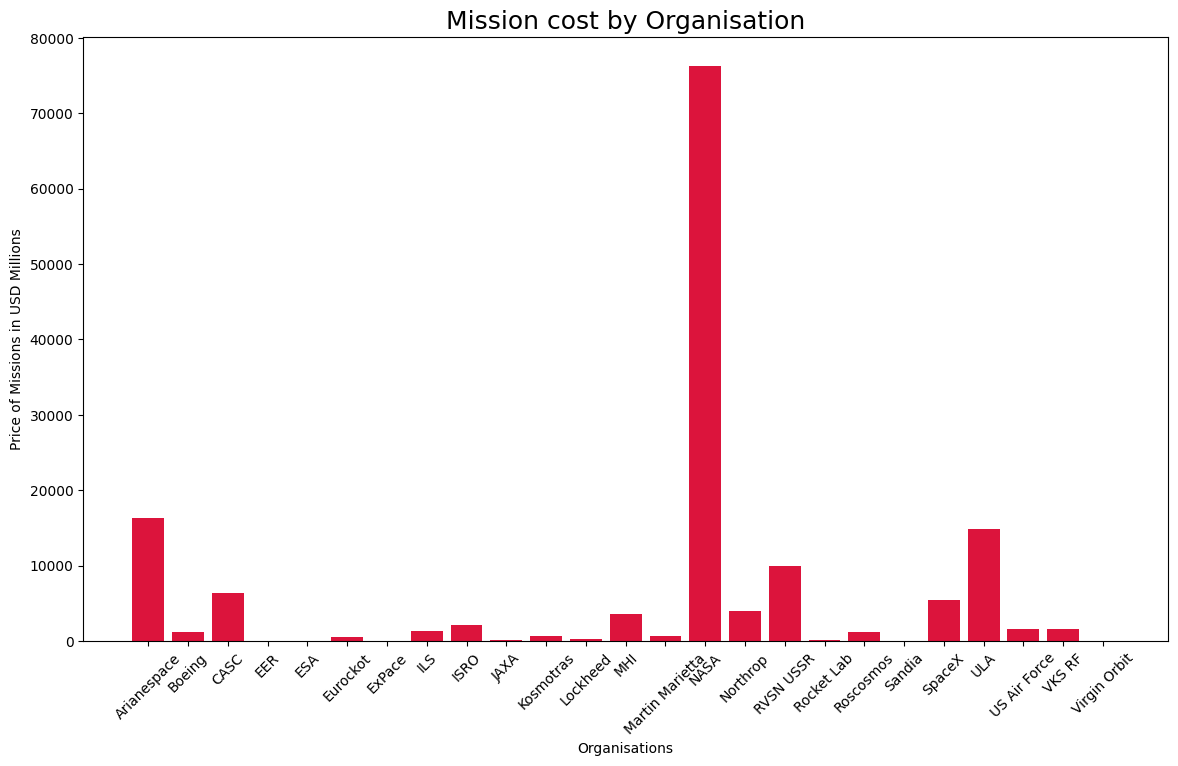

In [91]:
plt.figure(num=2, figsize=(14,8), dpi=100)
plt.title('Mission cost by Organisation', fontsize=18)
plt.xlabel('Organisations')
plt.xticks(rotation=45)
plt.ylabel("Price of Missions in USD Millions")
plt.bar(price_by_org.index, 
        price_by_org["Price"], 
        color='crimson')
 
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [92]:
price_by_org_per_launch = df_price_clean.groupby("Organisation").agg({"Price":['sum'], "Detail": ['count']})

In [93]:
price_by_org_per_launch.insert(loc=2,column="Price_per_launch", value = price_by_org_per_launch["Price"]['sum'].divide(price_by_org_per_launch["Detail"]['count']))

In [94]:
price_by_org_per_launch

,Price,Detail,Price_per_launch
,sum,count,
Organisation,,,
Arianespace,"16,345.00",96,170.26
Boeing,"1,241.00",7,177.29
CASC,"6,310.51",157,40.19
EER,20.00,1,20.00
ESA,37.00,1,37.00
Eurockot,543.40,13,41.80
ExPace,28.30,1,28.30
ILS,"1,320.00",13,101.54


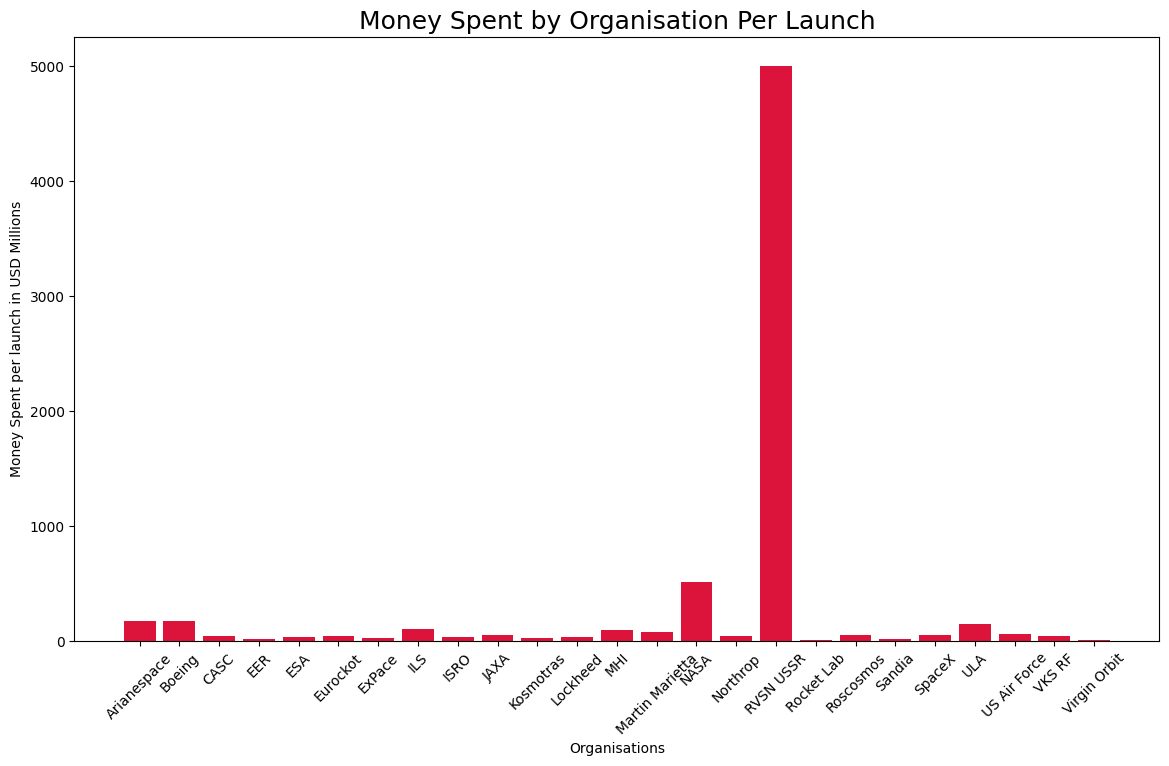

In [95]:
plt.figure(num=2, figsize=(14,8), dpi=100)
plt.title('Money Spent by Organisation Per Launch', fontsize=18)
plt.xlabel('Organisations')
plt.xticks(rotation=45)
plt.ylabel("Money Spent per launch in USD Millions")
plt.bar(price_by_org_per_launch.index, 
        price_by_org_per_launch["Price_per_launch"], 
        color='crimson')
 
plt.show()

# Chart the Number of Launches per Year

In [96]:
df_clean.insert(loc=8, column="Year", value=df_clean['Date'].apply(lambda x:x.split(" ")[3]))

In [97]:
df_clean["Year"] = pd.to_numeric(df_clean["Year"])

In [98]:
launches_per_year = df_clean.groupby("Year").count()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [99]:
launches_by_month = df_clean.groupby(df_clean['Date'].apply(lambda x:x.split(" ")[1])).count()

In [100]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
launches_by_month.index = pd.Categorical(launches_by_month.index, categories=months, ordered=True)
launches_by_month = launches_by_month.sort_index()
launches_by_month


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
Jan,268,268,268,268,268,66,268,268,268
Feb,336,336,336,336,336,60,336,336,336
Mar,353,353,353,353,353,77,353,353,353
Apr,383,383,383,383,383,91,383,383,383
May,326,326,326,326,326,86,326,326,326
Jun,402,402,402,402,402,85,402,402,402
Jul,351,351,351,351,351,77,351,351,351
Aug,373,373,373,373,373,82,373,373,373
Sep,365,365,365,365,365,88,365,365,365
Oct,381,381,381,381,381,83,381,381,381


In [101]:
launches_by_month_roll = launches_by_month.rolling(window=3).mean()


In [102]:
launches_by_month_roll

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mar,319.00,319.00,319.00,319.00,319.00,67.67,319.00,319.00,319.00
Apr,357.33,357.33,357.33,357.33,357.33,76.00,357.33,357.33,357.33
May,354.00,354.00,354.00,354.00,354.00,84.67,354.00,354.00,354.00
Jun,370.33,370.33,370.33,370.33,370.33,87.33,370.33,370.33,370.33
Jul,359.67,359.67,359.67,359.67,359.67,82.67,359.67,359.67,359.67
Aug,375.33,375.33,375.33,375.33,375.33,81.33,375.33,375.33,375.33
Sep,363.00,363.00,363.00,363.00,363.00,82.33,363.00,363.00,363.00
Oct,373.00,373.00,373.00,373.00,373.00,84.33,373.00,373.00,373.00


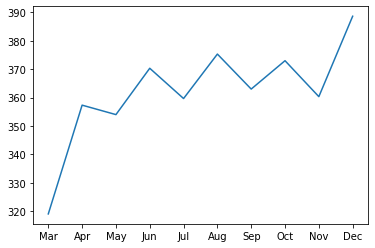

In [103]:
plt.plot(launches_by_month_roll.index, launches_by_month_roll.Detail)

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [104]:
launches_by_month["Detail"].idxmax()

'Dec'

In [105]:
launches_by_month["Detail"].idxmin()

'Jan'

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [106]:
pd.to_datetime(df_clean["Date"])
df_clean.sort_values(by="Date", ascending=True)


,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
4268,US Air Force,"SLC-17A, Cape Canaveral AFS, Florida, USA","Fri Apr 01, 1960 11:40 UTC",Thor DM-18 Able-II | TIROS-1,StatusRetired,NaN,Success,USA,1960
3366,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Fri Apr 02, 1971 08:20 UTC",Voskhod | Cosmos 403,StatusRetired,NaN,Success,RUS,1971
1262,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Fri Apr 02, 1999 22:03 UTC",Ariane 42P | Insat-2E,StatusRetired,NaN,Success,FRA,1999
734,Roscosmos,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Apr 02, 2010 04:04 UTC",Soyuz FG | Soyuz TMA-18,StatusRetired,NaN,Success,KAZ,2010
3480,RVSN USSR,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri Apr 03, 1970 08:30 UTC",Voskhod | Cosmos 329,StatusRetired,NaN,Success,RUS,1970
...,...,...,...,...,...,...,...,...,...
2245,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia","Wed Sep 28, 1983 07:59 UTC",Tsyklon-3 | Cosmos 1500,StatusRetired,NaN,Success,RUS,1983
3308,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia","Wed Sep 29, 1971 11:30 UTC",Voskhod | Cosmos 442,StatusRetired,NaN,Success,RUS,1971
2776,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia","Wed Sep 29, 1976 07:04 UTC",Cosmos-3M (11K65M) | Cosmos 858,StatusRetired,NaN,Success,RUS,1976
2376,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia","Wed Sep 30, 1981 08:00 UTC",Tsyklon-3 | Cosmos 1312,StatusRetired,NaN,Success,RUS,1981


In [107]:
df_price_clean['Price']

0       50.00
1       29.75
3       65.00
4      145.00
5       64.68
        ...  
3855    59.00
3971    63.23
3993    63.23
4000    63.23
4020    63.23
Name: Price, Length: 963, dtype: float64

In [108]:
price_by_time_roll = df_price_clean['Price'].rolling(window=50).mean()
price_by_time_roll

0         NaN
1         NaN
3         NaN
4         NaN
5         NaN
        ...  
3855   437.41
3971   438.06
3993   430.32
4000   422.59
4020   414.85
Name: Price, Length: 963, dtype: float64

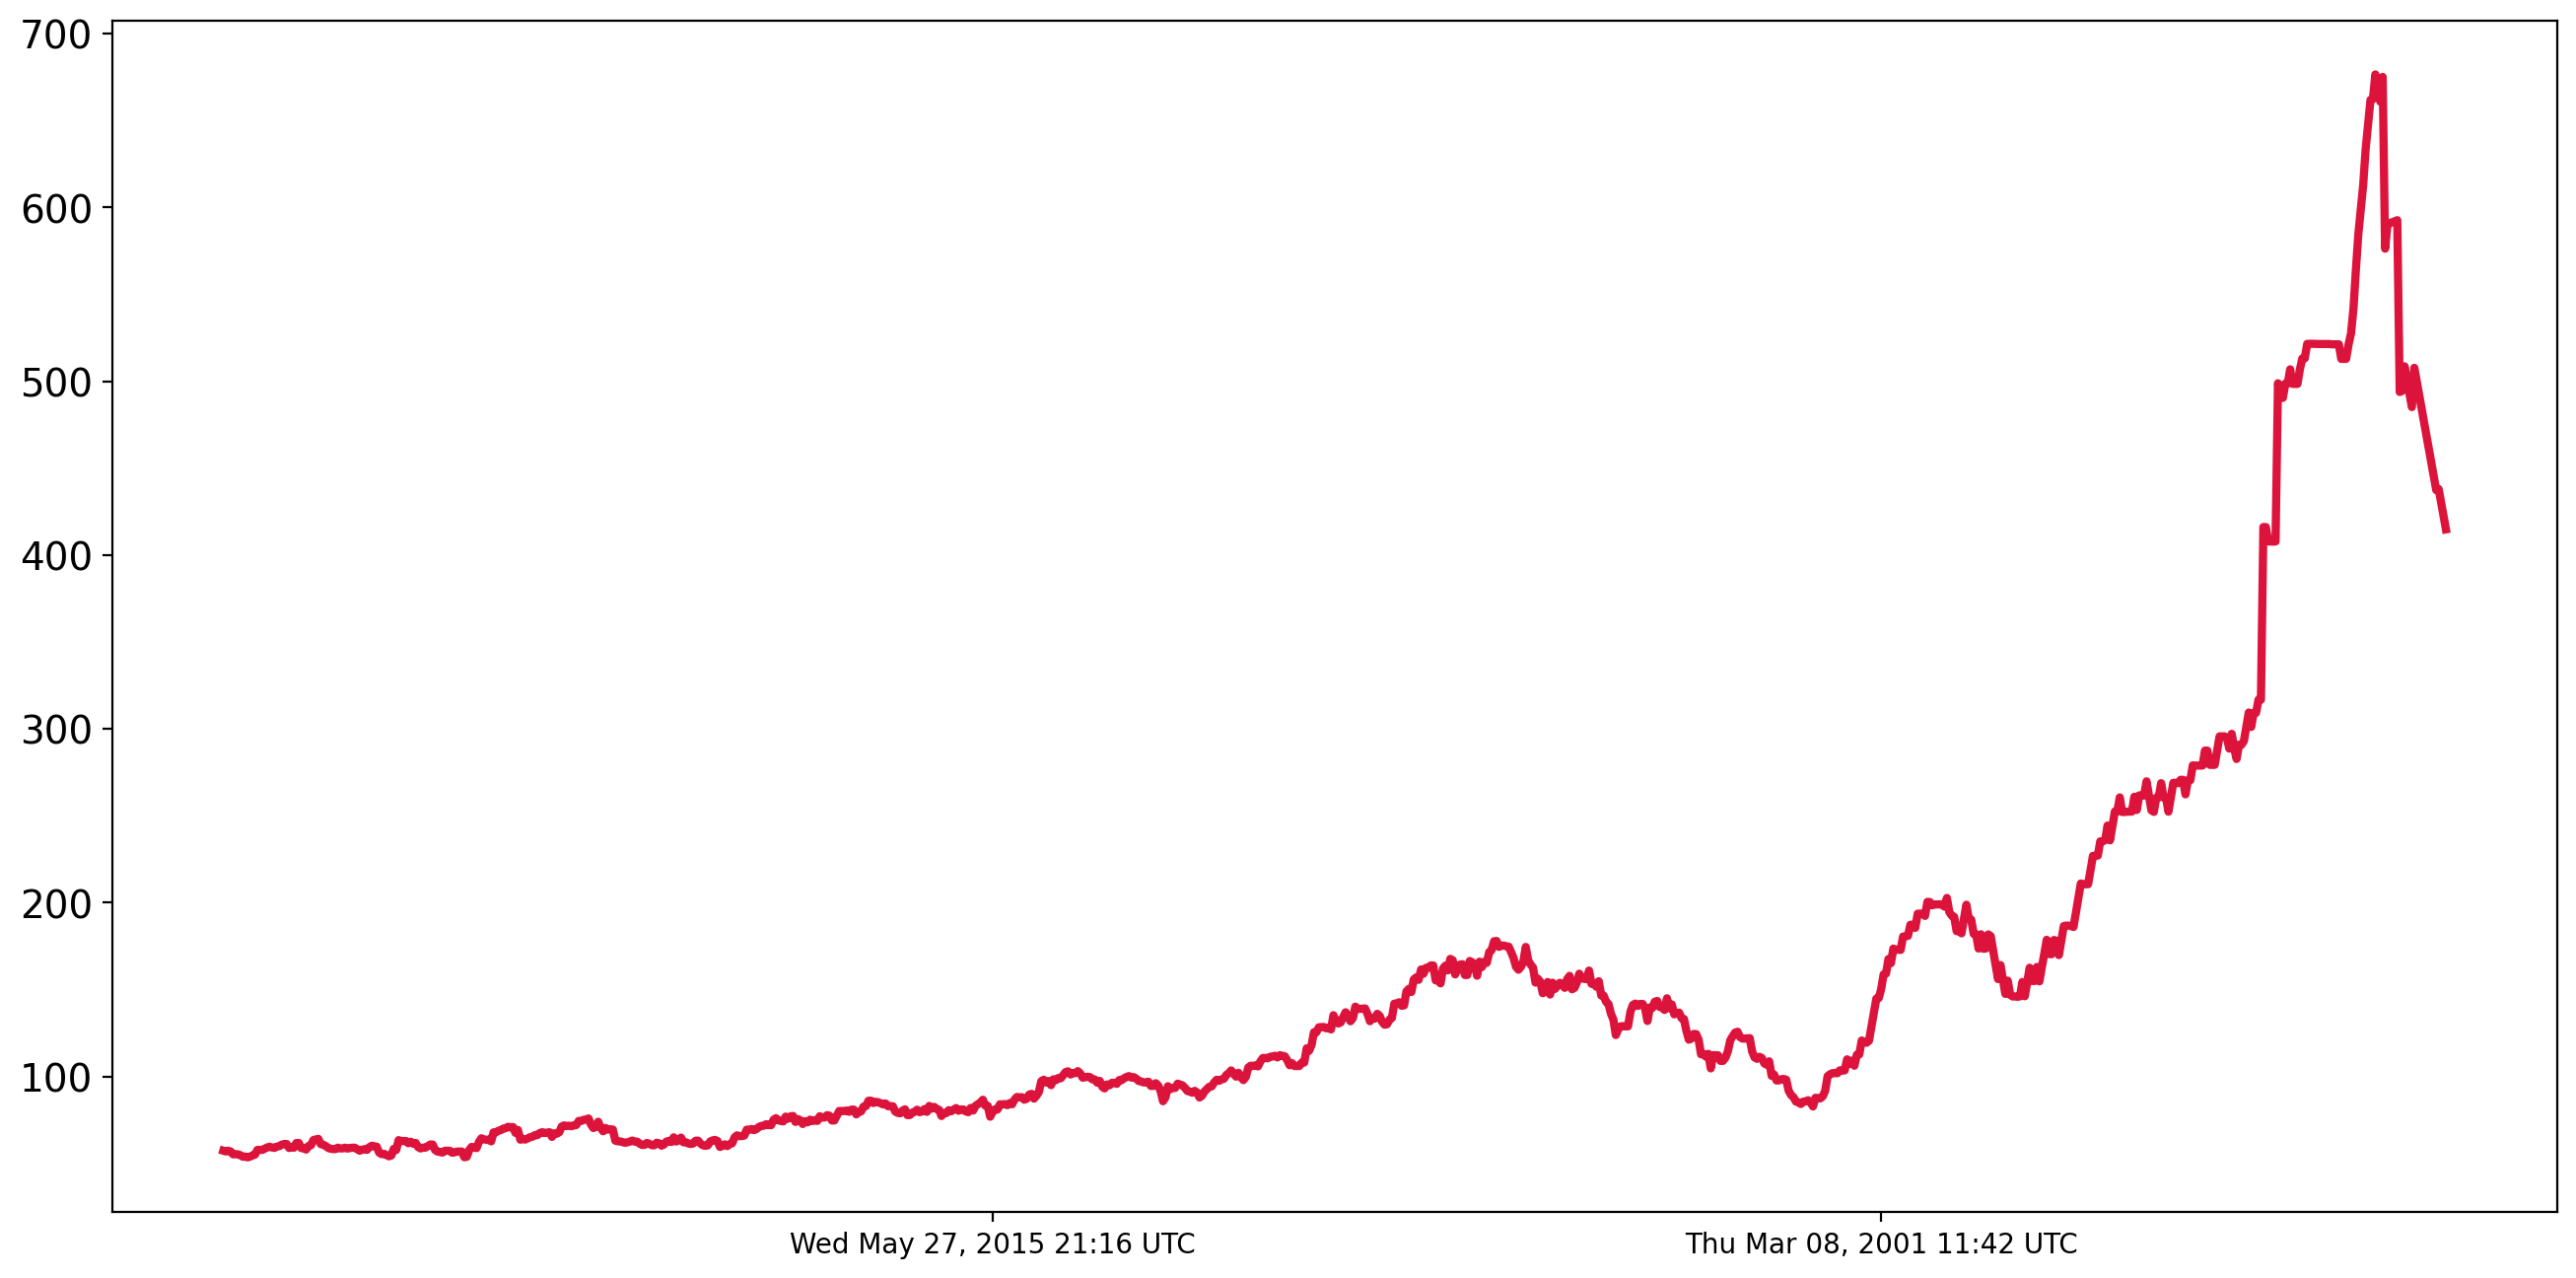

In [109]:
import matplotlib.dates as mdates
plt.figure(figsize=(16,8), dpi=200)
plt.yticks(fontsize=14)
 
ax = plt.gca() # get current axis
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.plot(df_price_clean.Date, 
        price_by_time_roll, 
        c='crimson', 
        linewidth=3,)
 
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [110]:
# Top 10 Organisation
successful_missions = df_clean[df_clean["Mission_Status"]=="Success"]
top_organisation = successful_missions.groupby("Organisation").count().reset_index().sort_values("Detail", ascending=False)[:10]["Organisation"].to_list()
launches_by_top_org = df_clean[df_clean["Organisation"].isin(top_organisation)]



In [111]:
launches_by_year_org = launches_by_top_org.groupby(["Organisation","Year"]).count()
launches_by_year_org

Location  Date  Detail  Rocket_Status  Price  \
Organisation Year                                                 
Arianespace  1984         3     3       3              3      0   
             1985         4     4       4              4      0   
             1986         3     3       3              3      0   
             1987         2     2       2              2      0   
             1988         6     6       6              6      0   
...                     ...   ...     ...            ...    ...   
VKS RF       2016         4     4       4              4      4   
             2017         6     6       6              6      3   
             2018         5     5       5              5      4   
             2019         8     8       8              8      5   
             2020         3     3       3              3      1   

                   Mission_Status  Country  
Organisation Year                           
Arianespace  1984               3        3  
             1985               4        4  
             1986               3        3  
             1987               2        2  
             1988               6        6  
...                           ...      ...  
VKS RF       2016               4        4  
             2017               6        6  
             2018               5        5  
             2019               8        8  
             2020               3        3  

[323 rows x 7 columns]

In [112]:
type(launches_by_year_org.xs(launches_by_year_org.index.levels[0][2]).reset_index()["Year"][0])


numpy.int64

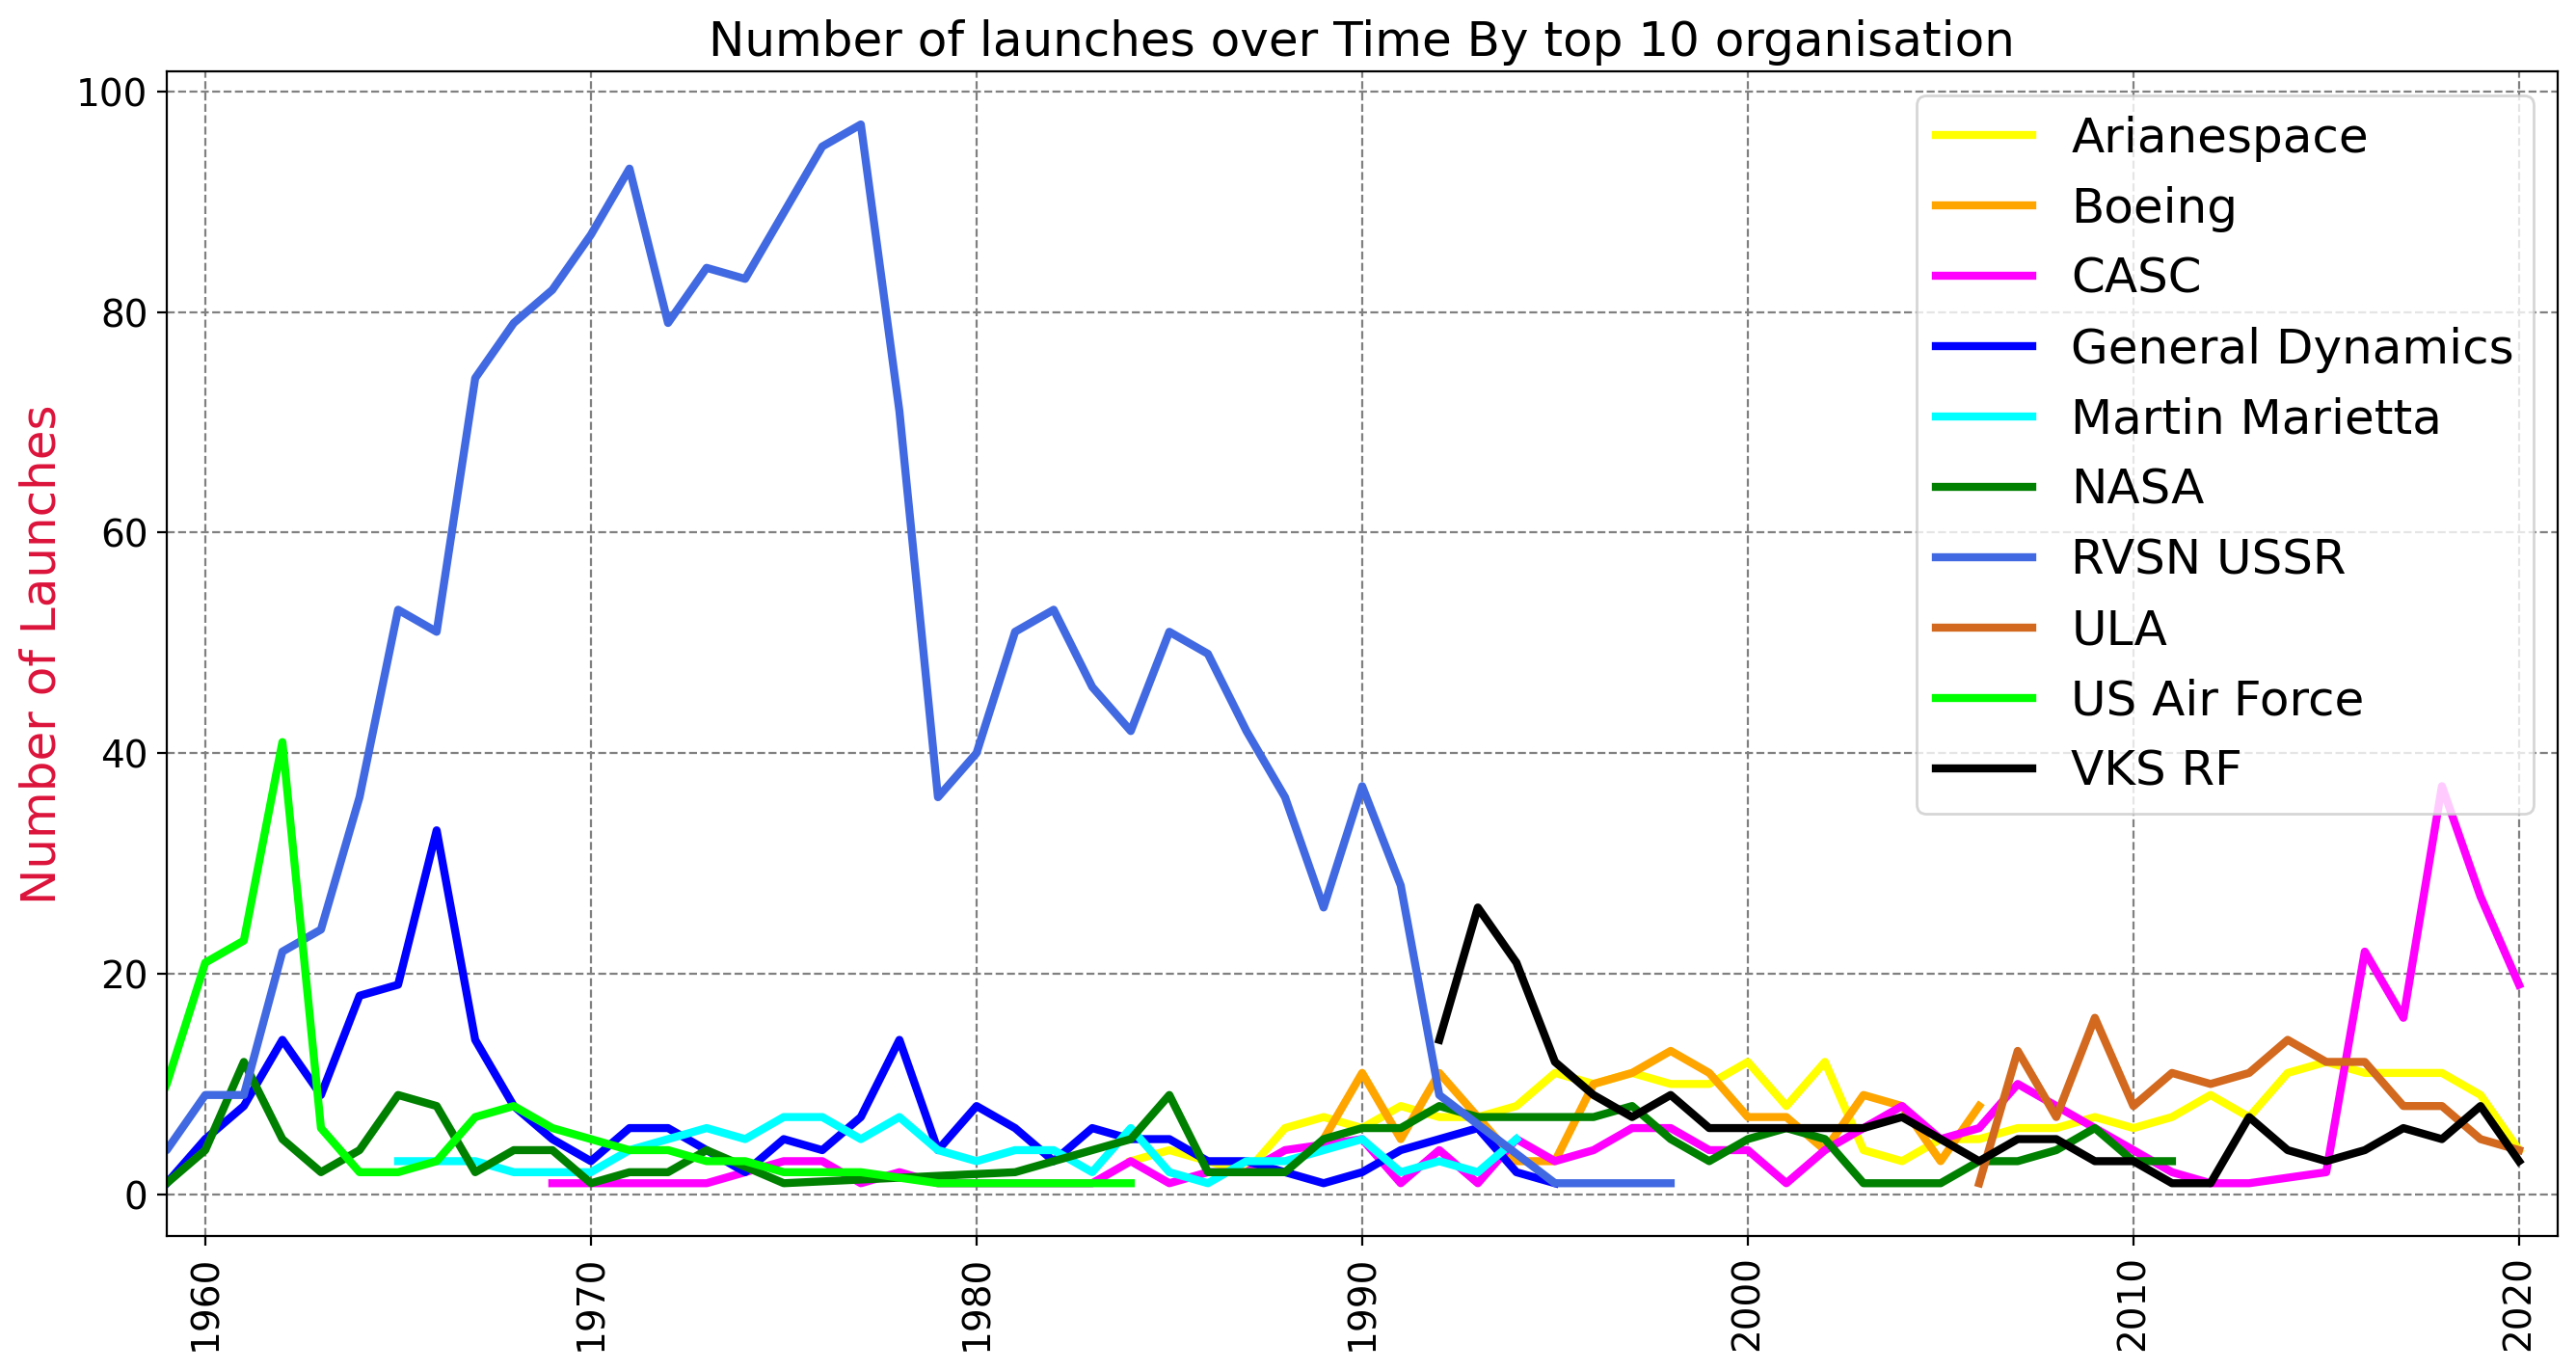

In [115]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of launches over Time By top 10 organisation', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

plt.ylabel('Number of Launches', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.set_xlim(1959,2021)


plt.grid(color='grey', linestyle='--')
org_1=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][0]).reset_index()
org_1_line, = plt.plot(org_1['Year'], 
                    org_1['Detail'], 
                    color='yellow', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][0])

org_2=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][1]).reset_index()
org_2_line, = plt.plot(org_2['Year'], 
                    org_2['Detail'], 
                    color='orange', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][1])

org_3=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][2]).reset_index()
org_3_line, = plt.plot(org_3['Year'], 
                    org_3['Detail'], 
                    color='magenta', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][2])

org_4=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][3]).reset_index()
org_4_line, = plt.plot(org_4['Year'], 
                    org_4['Detail'], 
                    color='blue', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][3])

org_5=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][4]).reset_index()
org_5_line, = plt.plot(org_5['Year'], 
                    org_5['Detail'], 
                    color='cyan', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][4])

org_6=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][5]).reset_index()
org_6_line, = plt.plot(org_6['Year'], 
                    org_6['Detail'], 
                    color='green', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][5])

org_7=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][6]).reset_index()
org_7_line, = plt.plot(org_7['Year'], 
                    org_7['Detail'], 
                    color='royalblue', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][6])

org_8=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][7]).reset_index()
org_8_line, = plt.plot(org_8['Year'], 
                    org_8['Detail'], 
                    color='chocolate', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][7])

org_9=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][8]).reset_index()
org_9_line, = plt.plot(org_9['Year'], 
                    org_9['Detail'], 
                    color='lime', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][8])

org_10=  launches_by_year_org.xs(launches_by_year_org.index.levels[0][9]).reset_index()
org_10_line, = plt.plot(org_10['Year'], 
                    org_10['Detail'], 
                    color='black', 
                    linewidth=3, 
                    label=launches_by_year_org.index.levels[0][9])
 
plt.legend(handles=[org_1_line, org_2_line, org_3_line, org_4_line, org_5_line, org_6_line, org_7_line, org_8_line, org_9_line, org_10_line],
           fontsize=18)
 
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [130]:
# launches during cold war space race
cold_war_launches = df_clean[df_clean["Year"] <= 1991]
cold_war_launches

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
1717,CASC,"LC-3, Xichang Satellite Launch Center, China","Sat Dec 28, 1991 12:00 UTC",Long March 3 | DFH-2A-T5,StatusRetired,NaN,Partial Failure,CHN,1991
1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,KAZ,1991
1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,RUS,1991
1720,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Mon Dec 16, 1991 22:19 UTC","Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,NaN,Success,FRA,1991
1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,1991
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957


In [131]:
cold_war_nations = ["USA", "RUS", "KAZ"]
cold_war_launches = cold_war_launches[cold_war_launches["Country"].isin(cold_war_nations)]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [150]:
ussr_launches_during_cold_war = df_clean[df_clean["Country"].isin(["RUS", "KAZ"])]
usa_launches_during_cold_war = df_clean[df_clean["Country"] == "USA"]

In [135]:
ussr_launches_during_cold_war.shape

2432

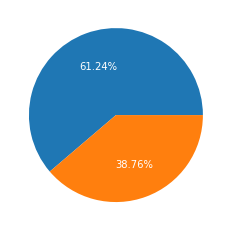

In [151]:
cty = ["USSR", "USA"]
launches = [ussr_launches_during_cold_war.shape[0], usa_launches_during_cold_war.shape[0]]
plt.pie(launches, labels = cty,autopct='%1.2f%%', textprops={'color':"w"})
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

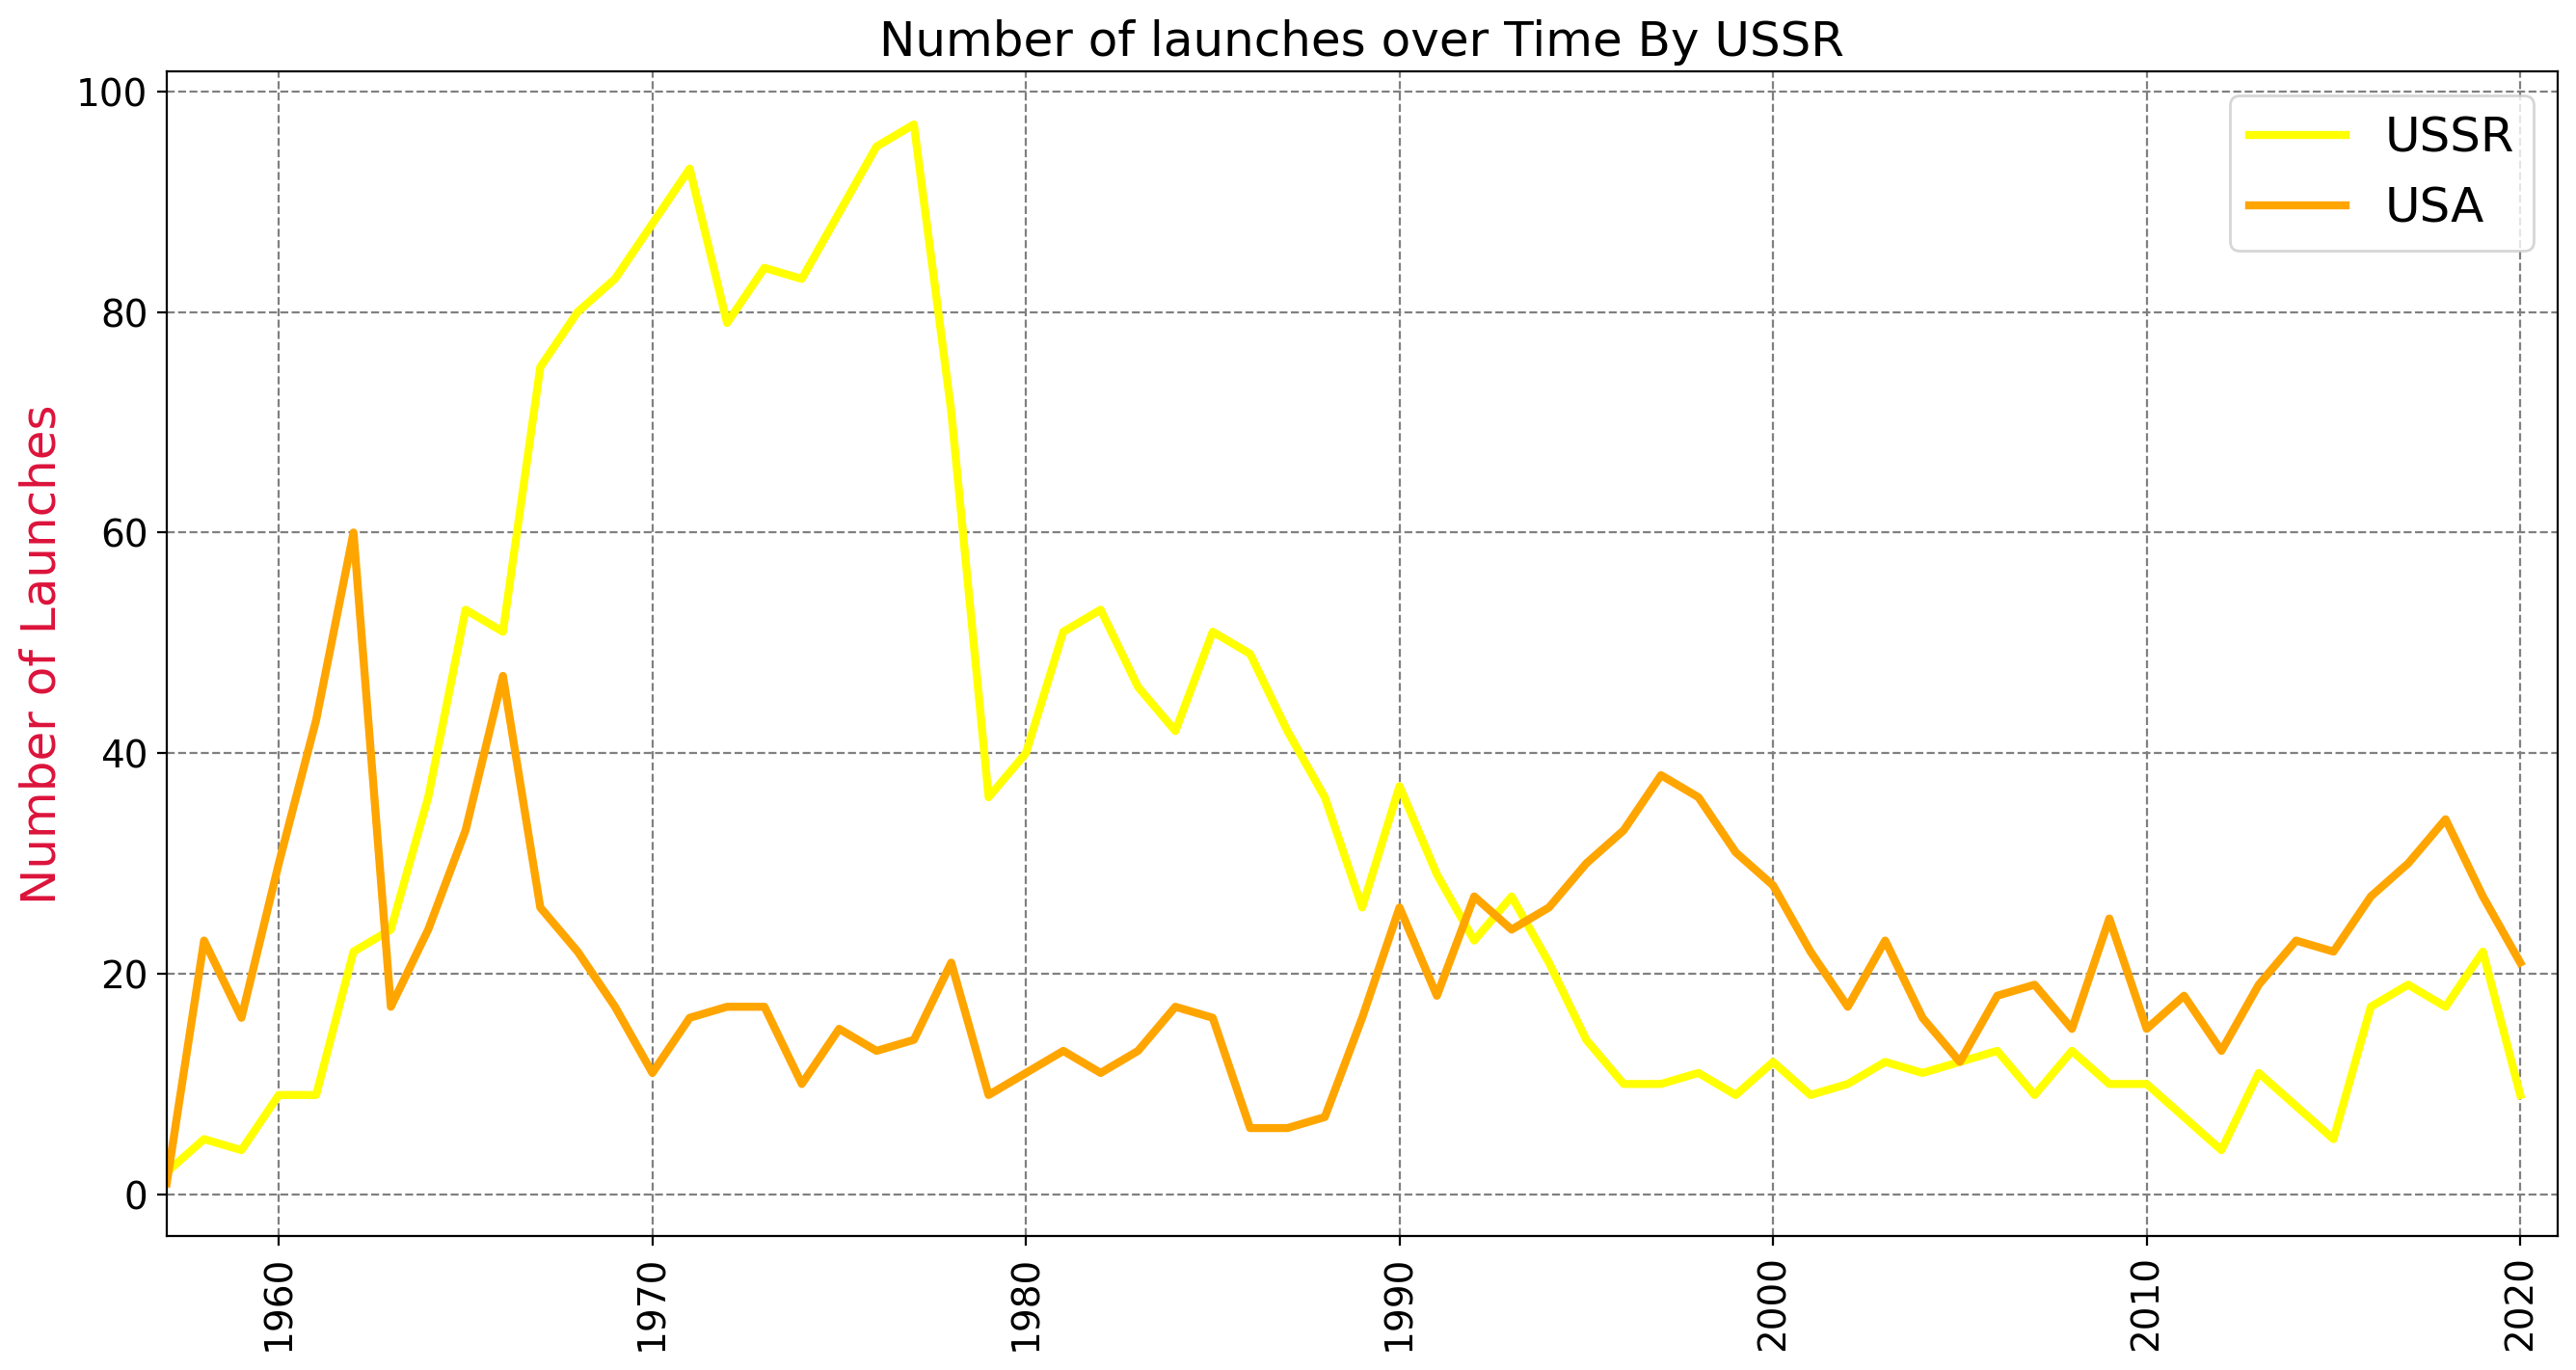

In [152]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of launches over Time By USSR', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

plt.ylabel('Number of Launches', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.set_xlim(1957,2021)


plt.grid(color='grey', linestyle='--')
ussr_launches = ussr_launches_during_cold_war.groupby("Year").count().reset_index()
ussr_line, = plt.plot(ussr_launches['Year'], 
                    ussr_launches['Detail'], 
                    color='yellow', 
                    linewidth=3, 
                    label="USSR")

usa_launches = usa_launches_during_cold_war.groupby("Year").count().reset_index()
usa_line, = plt.plot(usa_launches['Year'], 
                    usa_launches['Detail'], 
                    color='orange', 
                    linewidth=3, 
                    label="USA")

plt.legend(handles=[ussr_line, usa_line],
           fontsize=18)

## Chart the Total Number of Mission Failures Year on Year.

In [156]:
failed_launches = df_clean[df_clean["Mission_Status"] != "Success"]
failed_launches_by_year = failed_launches.groupby("Year").count().reset_index()


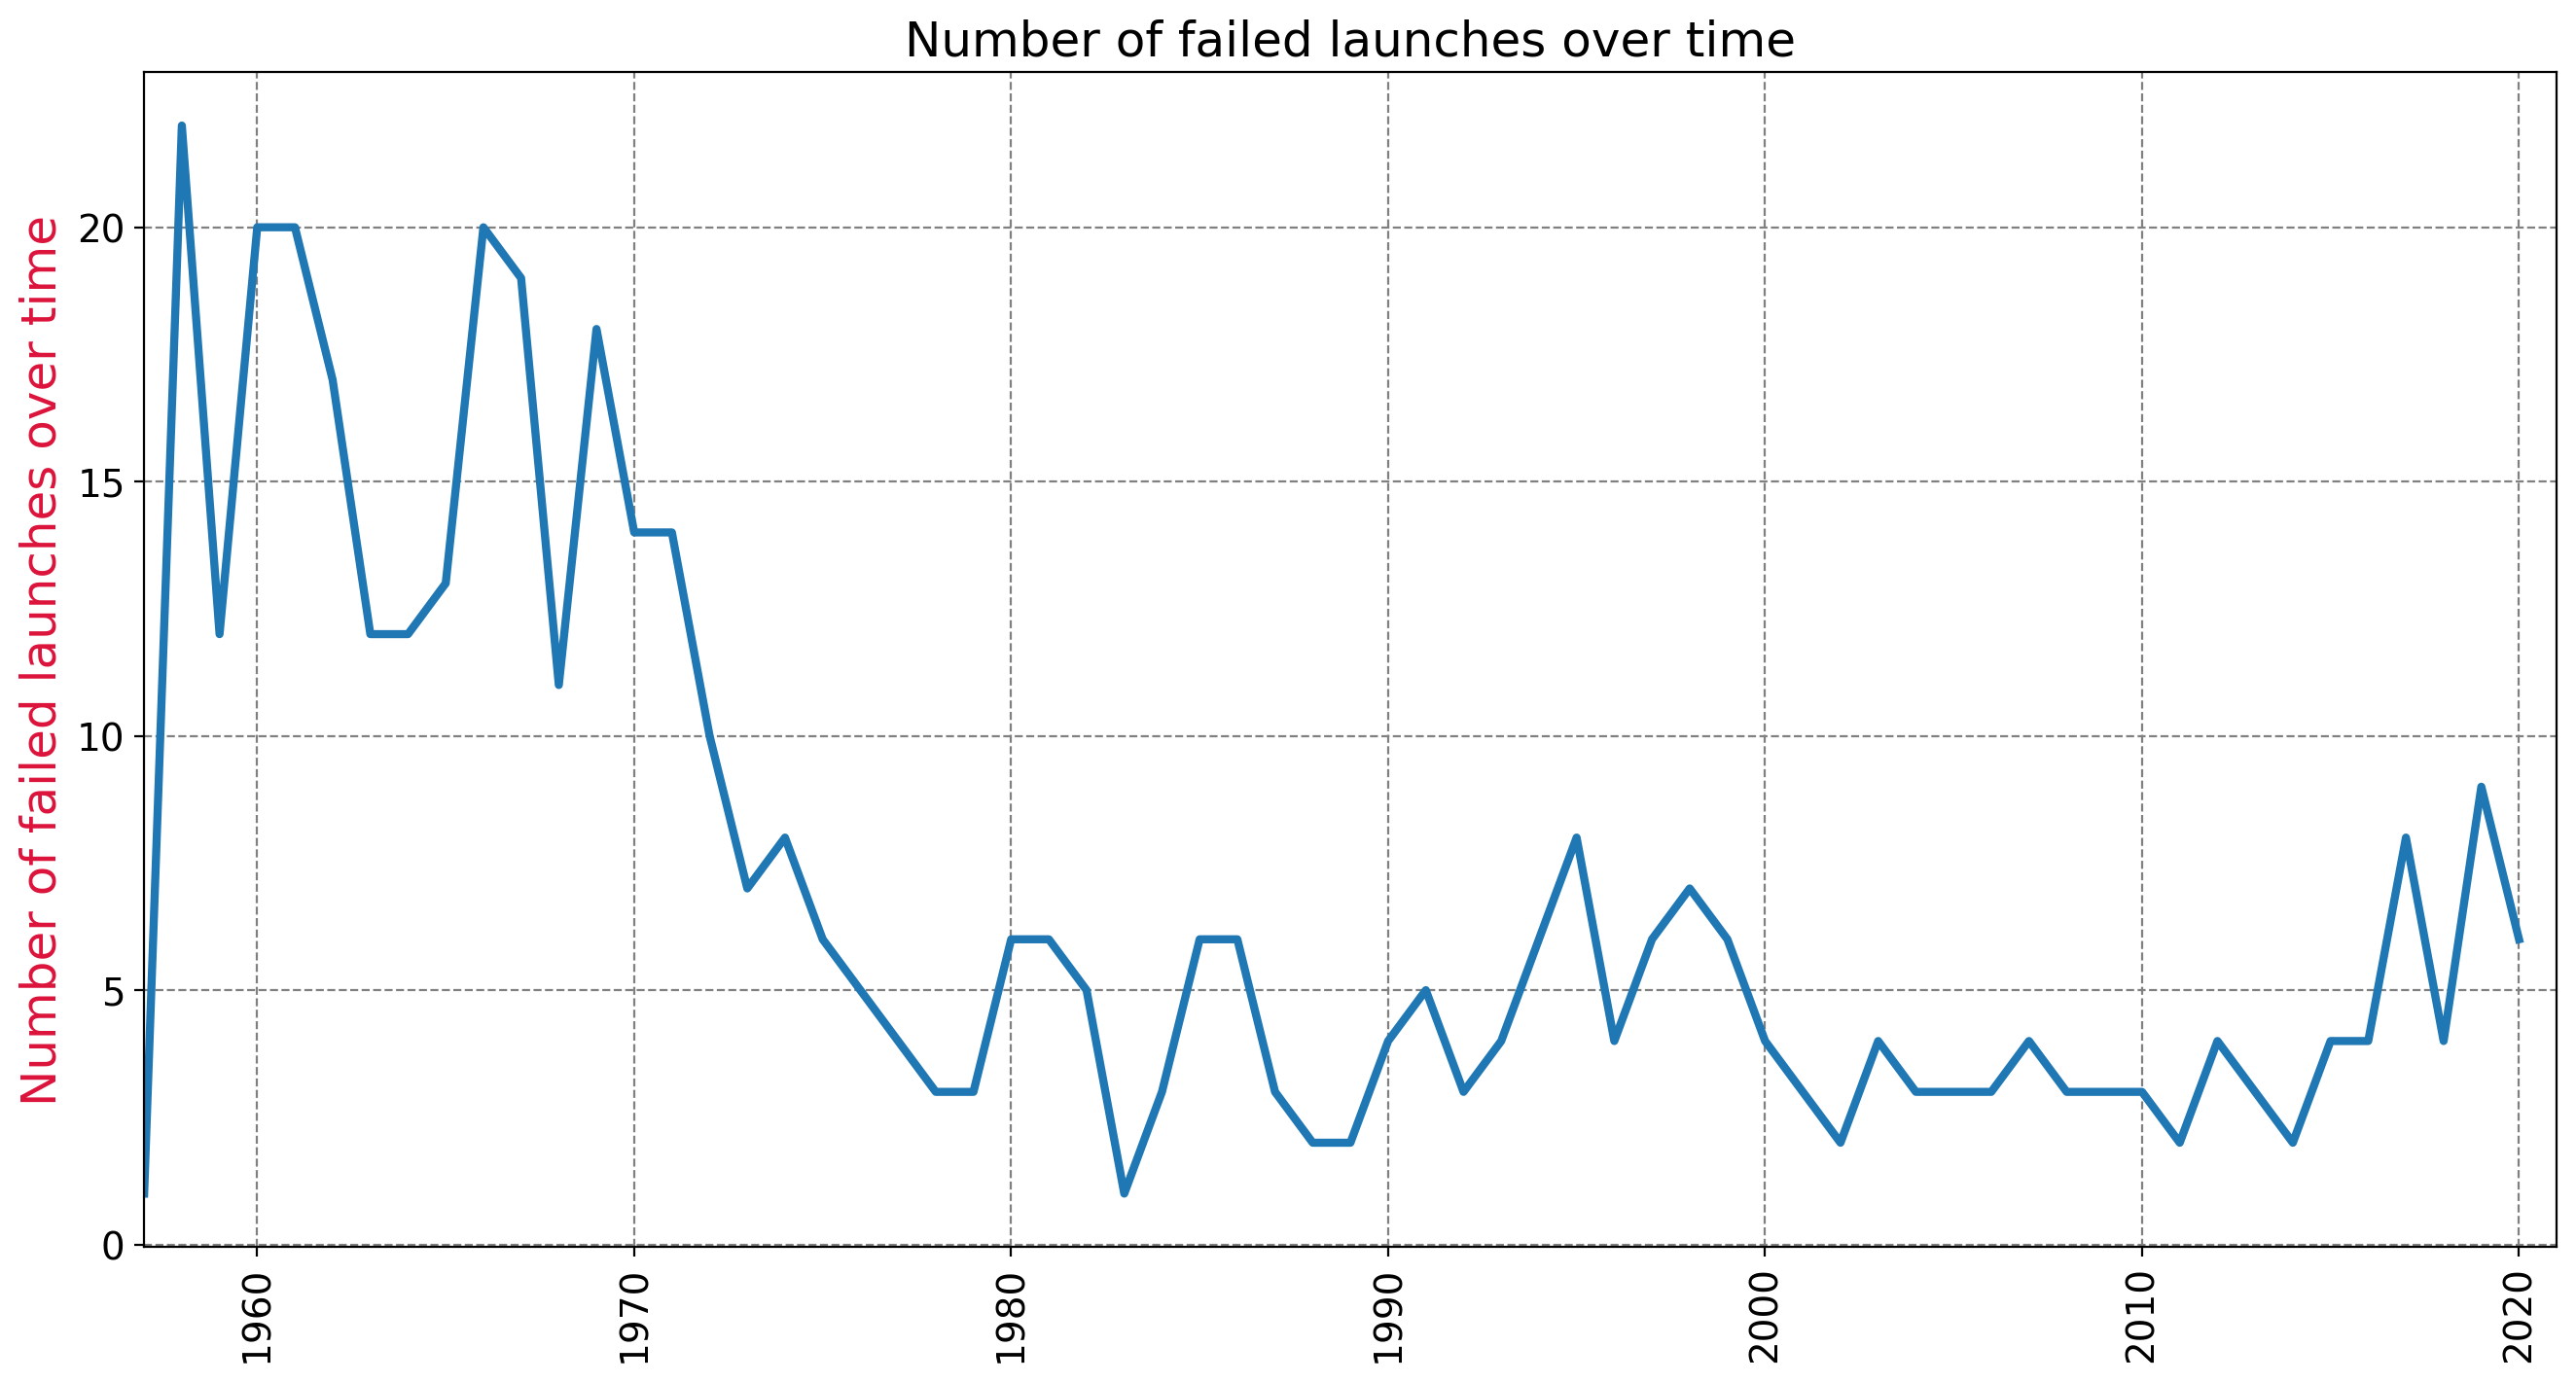

In [157]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of failed launches over time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)

plt.ylabel('Number of failed launches over time', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.set_xlim(1957,2021)


plt.grid(color='grey', linestyle='--')
plt.plot(failed_launches_by_year['Year'], 
                    failed_launches_by_year['Detail'], 
                    linewidth=3)



## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

,Year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
count,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00
mean,"1,988.50",6.95,6.95,6.95,6.95,6.95,0.84,6.95,6.95
std,18.62,5.44,5.44,5.44,5.44,5.44,1.09,5.44,5.44
min,"1,957.00",1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00
25%,"1,972.75",3.00,3.00,3.00,3.00,3.00,0.00,3.00,3.00
50%,"1,988.50",5.00,5.00,5.00,5.00,5.00,0.00,5.00,5.00
75%,"2,004.25",8.25,8.25,8.25,8.25,8.25,1.00,8.25,8.25
max,"2,020.00",22.00,22.00,22.00,22.00,22.00,4.00,22.00,22.00


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [207]:
lead_nation_by_year_index = df_clean.groupby(["Year","Country"]).count().groupby(level=0).idxmax()["Detail"]


Year
1957    KAZ
1958    USA
1959    USA
1960    USA
1961    USA
       ... 
2016    USA
2017    USA
2018    CHN
2019    CHN
2020    CHN
Name: Detail, Length: 64, dtype: object

In [210]:
lead_nation_by_year = lead_nation_by_year_index.apply(lambda x: x[1])

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [212]:
lead_organisaion_by_year_index = df_clean.groupby(["Year","Organisation"]).count().groupby(level=0).idxmax()["Detail"]


In [215]:
lead_organisaion_by_year = lead_organisaion_by_year_index.apply(lambda x: x[1]).reset_index()

Year
1957       (1957, RVSN USSR)
1958         (1958, US Navy)
1959    (1959, US Air Force)
1960    (1960, US Air Force)
1961    (1961, US Air Force)
                ...         
2016            (2016, CASC)
2017          (2017, SpaceX)
2018            (2018, CASC)
2019            (2019, CASC)
2020            (2020, CASC)
Name: Detail, Length: 64, dtype: object